In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from pandas import  DataFrame
from pandas import  concat

data = pd.read_csv('bitcoin2000.csv')

In [2]:
from sklearn.datasets import load_boston
import xgboost
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [4]:
data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timeUTC
0,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN,2019-12-12 19:00:00
1,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN,2019-12-12 20:00:00
2,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN,2019-12-12 21:00:00
3,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN,2019-12-12 22:00:00
4,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN,2019-12-12 23:00:00
...,...,...,...,...,...,...,...,...,...,...
10000,1612144800,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN,2021-02-01 11:00:00
10001,1612148400,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN,2021-02-01 12:00:00
10002,1612152000,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN,2021-02-01 13:00:00
10003,1612155600,33907.89,33467.87,33576.82,1198.20,40319458.23,33803.02,direct,NaN,2021-02-01 14:00:00


In [5]:
data.set_index(['timeUTC'],inplace=True)
#data = data['item_cnt_day'].resample('D').sum()
df=pd.DataFrame(data)

In [6]:
data = data[['high', 'low', 'open', 'volumefrom', 'volumeto', 'close']]
data

,high,low,open,volumefrom,volumeto,close
timeUTC,,,,,,
2019-12-12 19:00:00,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14
2019-12-12 20:00:00,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79
2019-12-12 21:00:00,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97
2019-12-12 22:00:00,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38
2019-12-12 23:00:00,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50
...,...,...,...,...,...,...
2021-02-01 11:00:00,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45
2021-02-01 12:00:00,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20
2021-02-01 13:00:00,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82


In [7]:
data.head(30)

,high,low,open,volumefrom,volumeto,close
timeUTC,,,,,,
2019-12-12 19:00:00,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14
2019-12-12 20:00:00,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79
2019-12-12 21:00:00,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97
2019-12-12 22:00:00,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38
2019-12-12 23:00:00,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50
2019-12-13 00:00:00,7202.12,7162.03,7173.50,856.09,6141960.66,7202.12
2019-12-13 01:00:00,7225.83,7192.73,7202.12,1376.21,9922529.82,7212.33
2019-12-13 02:00:00,7222.08,7200.95,7212.33,586.49,4235649.04,7213.47
2019-12-13 03:00:00,7234.95,7200.95,7213.47,1353.88,9767060.92,7224.86


In [8]:
days_in = 24
days_out = 1

raw = []

for i in range (days_in,0,-1):
    raw.append(data.shift(i))
    
for i in range (0, days_out):
    raw.append(data.shift(-i))

sum = concat(raw, axis = 1)
sum.dropna(inplace = True)

sum

,high,low,open,volumefrom,volumeto,close,high,low,open,volumefrom,...,open,volumefrom,volumeto,close,high,low,open,volumefrom,volumeto,close
timeUTC,,,,,,,,,,,,,,,,,,,,,
2019-12-13 19:00:00,7219.93,7149.15,7170.18,1536.79,1.104199e+07,7166.14,7208.36,7166.03,7166.14,785.11,...,7220.50,472.78,3423988.93,7219.70,7232.68,7217.48,7219.70,339.53,2459693.03,7227.46
2019-12-13 20:00:00,7208.36,7166.03,7166.14,785.11,5.654607e+06,7199.79,7222.43,7194.87,7199.79,672.46,...,7219.70,339.53,2459693.03,7227.46,7245.84,7223.46,7227.46,463.22,3354372.23,7235.63
2019-12-13 21:00:00,7222.43,7194.87,7199.79,672.46,4.855213e+06,7199.97,7211.80,7187.29,7199.97,807.61,...,7227.46,463.22,3354372.23,7235.63,7237.18,7215.11,7235.63,640.52,4631577.03,7236.75
2019-12-13 22:00:00,7211.80,7187.29,7199.97,807.61,5.821088e+06,7201.38,7229.22,7152.84,7201.38,1606.06,...,7235.63,640.52,4631577.03,7236.75,7245.95,7231.35,7236.75,527.28,3816853.97,7245.95
2019-12-13 23:00:00,7229.22,7152.84,7201.38,1606.06,1.153780e+07,7173.50,7202.12,7162.03,7173.50,856.09,...,7236.75,527.28,3816853.97,7245.95,7247.49,7231.39,7245.95,999.04,7235964.52,7238.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01 11:00:00,34275.76,33719.52,34232.05,2976.77,1.006322e+08,33775.09,34063.30,33672.64,33775.09,1115.80,...,32584.49,2514.36,83239827.85,33450.01,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45
2021-02-01 12:00:00,34063.30,33672.64,33775.09,1115.80,3.783617e+07,33945.00,34129.04,33829.40,33945.00,788.94,...,33450.01,2066.49,69445570.35,33675.45,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20
2021-02-01 13:00:00,34129.04,33829.40,33945.00,788.94,2.682315e+07,34062.28,34070.12,33713.05,34062.28,810.94,...,33675.45,1173.82,39473368.04,33590.20,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82


In [9]:
sum.shape

(9981, 150)

In [10]:
cols = sum.columns[:]
cols

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close', 'high', 'low',
       'open', 'volumefrom',
       ...
       'open', 'volumefrom', 'volumeto', 'close', 'high', 'low', 'open',
       'volumefrom', 'volumeto', 'close'],
      dtype='object', length=150)

In [11]:
sum.columns[-1]

'close'

In [17]:
from sklearn.preprocessing import MinMaxScaler
values = sum.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [18]:
scaled.shape

(9981, 150)

In [19]:
train_size = int(len(scaled) * 0.90)
test_size = int(len(scaled) * 0.10)

In [20]:
train, test = scaled[0:train_size,:], scaled[train_size:,:]
print(len(train),len(test))

8982 999


In [22]:
sum.shape

(9981, 150)

In [24]:
X_train = train[:,0:-1]
y_train = train[:,149]
X_test = test[:,0:-1]
y_test = test[:,149]

In [25]:
x = scaled [:,0:-1]
y = scaled [:,149]

In [26]:
folds=[]
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=None)


In [27]:
for train, test in tscv.split(x):
    folds.append((train, test))
    print("TRAIN:", train, "TEST:", test)
    train_x, test_x = x[train], x[test]
    train_y, test_y = y[train], y[test]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [28]:
evals = [ (train_x, train_y), (test_x, test_y)]

In [29]:
train_x.shape

(9660, 149)

In [30]:
train_x

array([[6.9533341e-02, 8.6421244e-02, 7.8643724e-02, ..., 7.9973117e-02,
        7.5448304e-04, 1.6477364e-04],
       [6.9223486e-02, 8.6877085e-02, 7.8535259e-02, ..., 8.0181435e-02,
        1.2797378e-03, 2.7862354e-04],
       [6.9600292e-02, 8.7655909e-02, 7.9438612e-02, ..., 8.0400750e-02,
        2.0326495e-03, 4.4115068e-04],
       ...,
       [8.4006369e-01, 8.5312057e-01, 8.4415025e-01, ..., 8.4721094e-01,
        4.2042881e-03, 5.1192846e-03],
       [8.4294766e-01, 8.5420644e-01, 8.4309226e-01, ..., 8.5224742e-01,
        4.2495141e-03, 5.1971432e-03],
       [8.6330789e-01, 8.6754543e-01, 8.5459936e-01, ..., 8.5589325e-01,
        2.9640857e-03, 3.8111832e-03]], dtype=float32)

In [31]:
test_x.shape

(321, 149)

### xgb_boost

xgb_boost(1) 

In [32]:
from numpy import sqrt 
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [33]:
xgb_model1 = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=50)

xgb_model1.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
predict = xgb_model1.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = xgb_model1.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.8147824555635452
Test RMSE : 0.00861526
Test MAE : 0.0063437894
Test MSE : 7.42227e-05


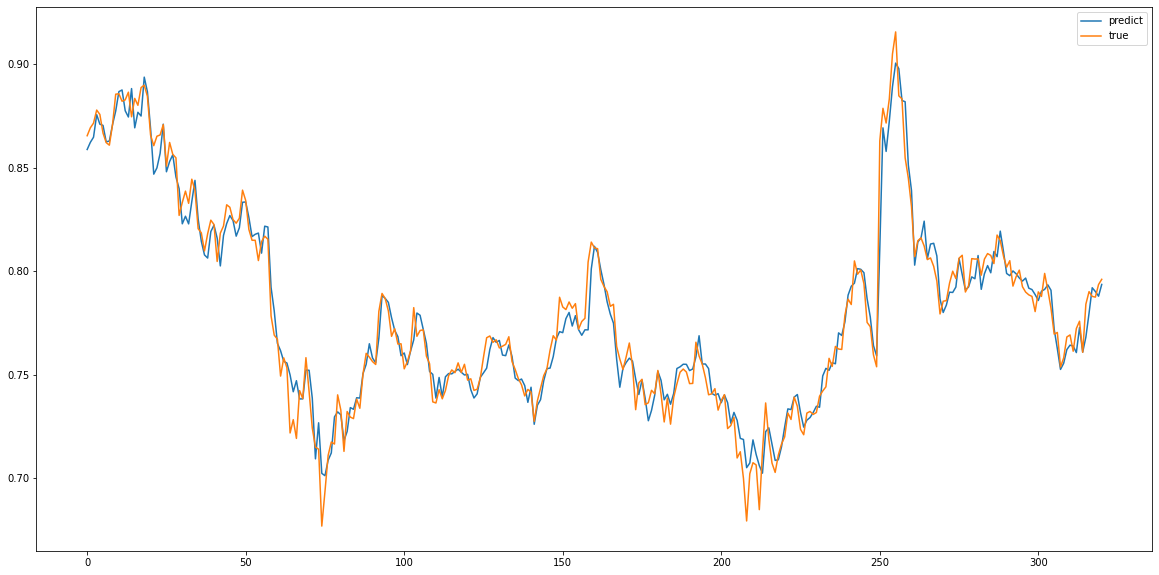

In [36]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = xgb_model1.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

### lightgbm

In [37]:
from lightgbm import LGBMRegressor

In [38]:
lgbm_r = LGBMRegressor(n_estimators = 100, random_state = 30)

In [39]:
lgbm_r.fit(train_x, train_y,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)

/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.989906	training's l2: 0.0252701	valid_1's auc: 1	valid_1's l2: 0.266706
[2]	training's auc: 0.991925	training's l2: 0.0204759	valid_1's auc: 1	valid_1's l2: 0.215794
[3]	training's auc: 0.991925	training's l2: 0.0165914	valid_1's auc: 1	valid_1's l2: 0.174723
[4]	training's auc: 0.991925	training's l2: 0.0134442	valid_1's auc: 1	valid_1's l2: 0.141105
[5]	training's auc: 0.99208	training's l2: 0.0108945	valid_1's auc: 1	valid_1's l2: 0.114226
[6]	training's auc: 0.99208	training's l2: 0.00882871	valid_1's auc: 1	valid_1's l2: 0.0925502
[7]	training's auc: 0.99208	training's l2: 0.00715485	valid_1's auc: 1	valid_1's l2: 0.0750179
[8]	training's auc: 0.994047	training's l2: 0.00579856	valid_1's auc: 1	valid_1's l2: 0.0607186
[9]	training's auc: 0.994565	training's l2: 0.00469986	valid_1's auc: 1	valid_1's l2: 0.04907
[10]	training's auc: 0.994565	training's l2: 0.0038095	valid_1's auc: 1	valid_1's l2: 0.0397652
[11]	training's auc: 0.994565	training's l2: 0.00308807

LGBMRegressor(random_state=30)

In [40]:
predict = lgbm_r.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = lgbm_r.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.012432640438049555
Test RMSE : 0.012650817003365377
Test MAE : 0.00971317565101935
Test MSE : 0.00016004317085263853


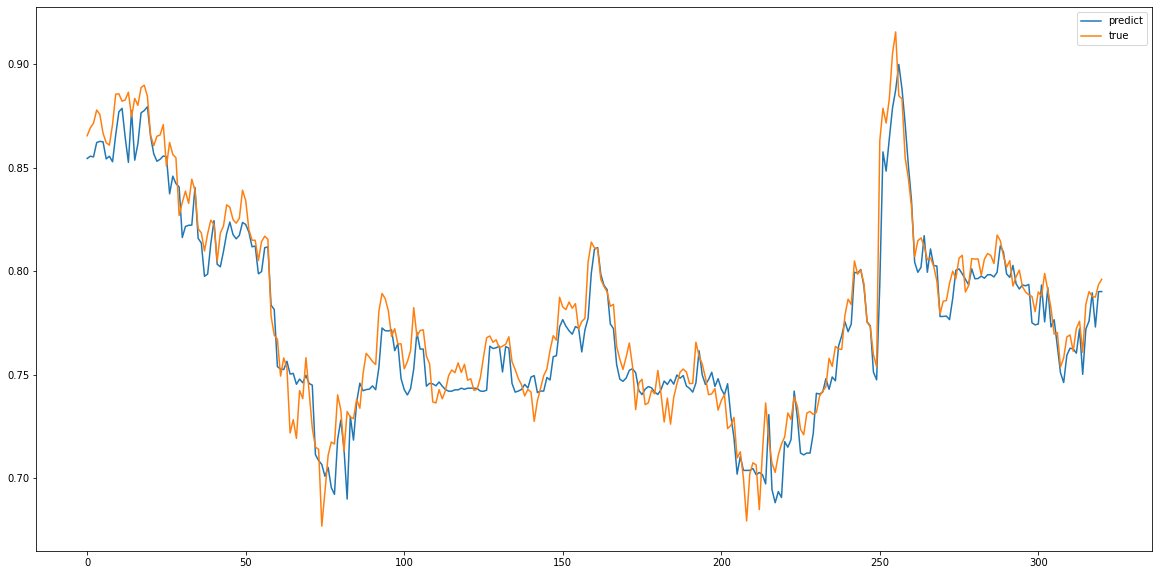

In [41]:

from sklearn.metrics import *

from matplotlib import pyplot
yhat = lgbm_r.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()


## r_f

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [43]:
params = {
    'n_estimators':(100, 500),
    'max_depth' : (5, 30),
    'min_samples_leaf' : (3, 10),
    'min_samples_split' : (3, 10)
}

In [44]:
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 30), 'min_samples_leaf': (3, 10),
                         'min_samples_split': (3, 10),
                         'n_estimators': (100, 500)})

In [45]:
print("GridSearchCV best params:", grid_cv.best_params_)

GridSearchCV best params: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [46]:
predict = grid_cv.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = grid_cv.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.00724617002116302
Test RMSE : 0.008286861220880378
Test MAE : 0.005632214942788031
Test MSE : 6.867206889413104e-05


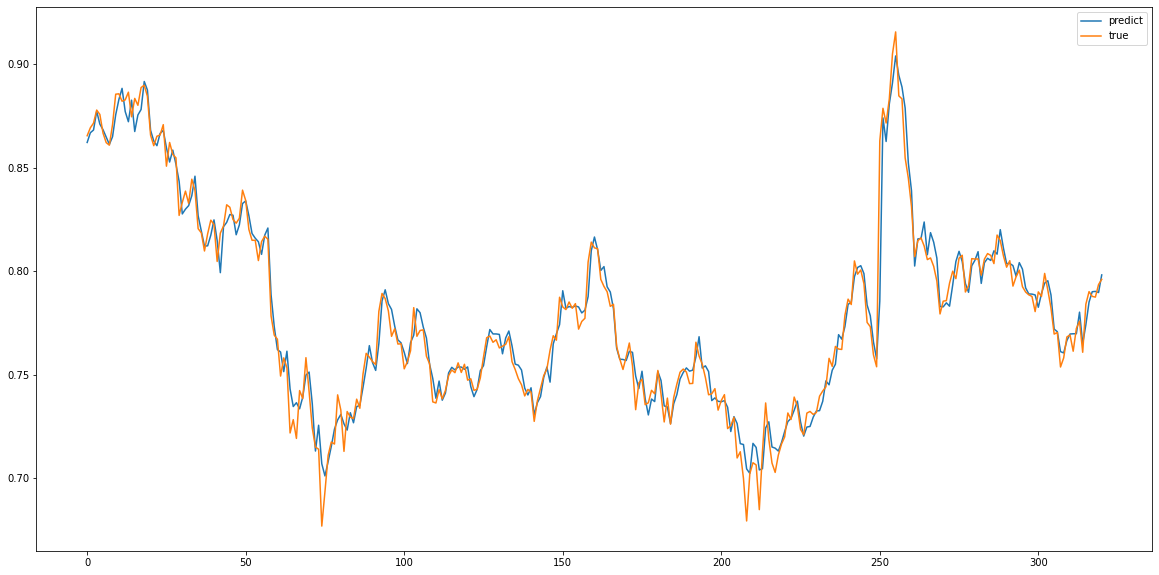

In [47]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = grid_cv.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()